<a href="https://colab.research.google.com/github/kaviya-chellamuthu/DIABETES-PREDETION-MODEL/blob/main/diabetespredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv('/content/diabetes (1).csv')

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X =df.drop(['Glucose','Outcome'],axis=1)
y = df['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
 
rf.fit(X_train,y_train)
pred2 = rf.predict(X_test)
print('-----------------RANDOM FOREST----------------')
print(classification_report(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print('----------------------------------------------')

-----------------RANDOM FOREST----------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       167
           1       0.56      0.54      0.55        89

    accuracy                           0.69       256
   macro avg       0.66      0.66      0.66       256
weighted avg       0.69      0.69      0.69       256

[[129  38]
 [ 41  48]]
----------------------------------------------


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print('-----------------DECISION TREE----------------')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('----------------------------------------------')

-----------------DECISION TREE----------------
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       170
           1       0.40      0.40      0.40        86

    accuracy                           0.60       256
   macro avg       0.55      0.55      0.55       256
weighted avg       0.60      0.60      0.60       256

[[120  50]
 [ 52  34]]
----------------------------------------------


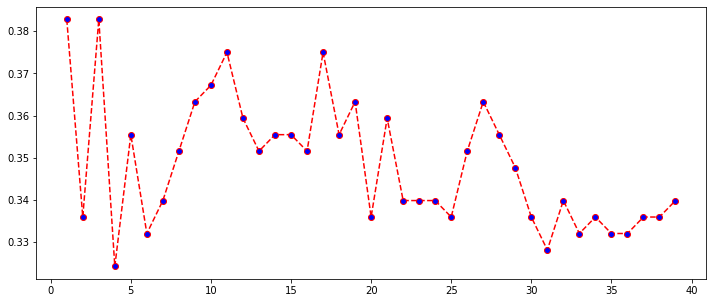

-----------------K NEAREST NEIGHBOURS------------------
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       170
           1       0.46      0.33      0.38        86

    accuracy                           0.64       256
   macro avg       0.58      0.57      0.57       256
weighted avg       0.62      0.64      0.63       256

[[137  33]
 [ 58  28]]
-------------------------------------------------------


In [ ]:
arr = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    arr.append(np.mean(pred != y_test))
plt.figure(figsize=(12,5))
plt.plot(range(1,40),arr,color = 'red',linestyle = 'dashed',marker = 'o',markerfacecolor = 'blue')
plt.show()
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('-----------------K NEAREST NEIGHBOURS------------------')
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print('-------------------------------------------------------')

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)
pre = log.predict(X_test)
print('-----------------LOGESTIC REGRESSION-------------------')
print(classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))
print('-------------------------------------------------------')

-----------------LOGESTIC REGRESSION-------------------
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       170
           1       0.49      0.40      0.44        86

    accuracy                           0.66       256
   macro avg       0.61      0.59      0.60       256
weighted avg       0.64      0.66      0.65       256

[[135  35]
 [ 52  34]]
-------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
plot1 = SVC()
plot1.fit(X_train,y_train)
pred1 = plot1.predict(X_test)
print('-----------------SUPPORT VECTOR MACHINE----------------')
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print('-------------------------------------------------------')

-----------------SUPPORT VECTOR MACHINE----------------
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       170
           1       0.58      0.22      0.32        86

    accuracy                           0.68       256
   macro avg       0.64      0.57      0.56       256
weighted avg       0.66      0.68      0.63       256

[[156  14]
 [ 67  19]]
-------------------------------------------------------


In [ ]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)
Y_pred = classifier.predict(X_test)
print('------------------NAIVE BAYES---------------------')
print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))
print('--------------------------------------------------')

------------------NAIVE BAYES---------------------
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       170
           1       0.52      0.48      0.50        86

    accuracy                           0.68       256
   macro avg       0.63      0.63      0.63       256
weighted avg       0.67      0.68      0.67       256

[[132  38]
 [ 45  41]]
--------------------------------------------------


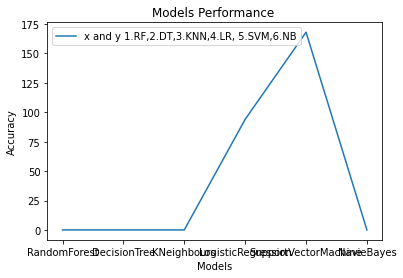

In [ ]:
#line chart

import matplotlib.pyplot as plt
 
x  = ['RandomForest','DecisionTree','KNeighbours','LogisticRegression','SupportVectorMachine','NavieBayes' ]
y = [0,0,0,94,168,0]

plt.plot(x, y, label="x and y 1.RF,2.DT,3.KNN,4.LR, 5.SVM,6.NB")
plt.plot()

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Performance ")
plt.legend()
plt.show()

In [ ]:
import itertools
log = LogisticRegression()
log.fit(X_train,y_train)
y_proba = log.predict(X_test)
print('-----------------LOGESTIC REGRESSION-------------------')
print(classification_report(y_test,y_proba))
print(confusion_matrix(y_test,y_proba))
print('-------------------------------------------------------')
#support vector machine
conf=confusion_matrix(y_test,y_proba)

-----------------LOGESTIC REGRESSION-------------------
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       170
           1       0.49      0.40      0.44        86

    accuracy                           0.66       256
   macro avg       0.61      0.59      0.60       256
weighted avg       0.64      0.66      0.65       256

[[135  35]
 [ 52  34]]
-------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 15.0, 'Predicted label')

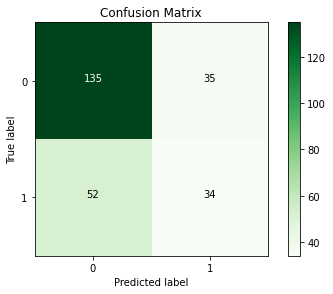

In [ ]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
TP = true_pos = 34
TN = true_neg = 135
FP = false_pos = 35
FN = false_neg = 52

In [ ]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.660


In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.395


In [ ]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.794


In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.493


In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.722


In [ ]:
metric = "FPR"
results[metric] = FP / (FP + TN)
print(f"{metric} is {results[metric]: .3f}")

FPR is  0.206


In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.439


In [ ]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.202


In [ ]:
FNR= FN/(FN+TP)
print(FNR)

0.6046511627906976


In [ ]:
def get_roc_curve(y_test, y_proba, delta=0.1):
   
    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_proba.shape)
    for th in thresh:
        y_pred[y_proba < th] = 0
        y_pred[y_proba >= th] = 1
        
      
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  
        FPR = FP / (FP + TN)  
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
from sklearn import metrics
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

In [ ]:
plr=TPRs/FPRs
print(plr)

[       nan 1.92026578 1.        ]


<ipython-input-27-713922fa280c>:1: RuntimeWarning: invalid value encountered in true_divide
  plr=TPRs/FPRs


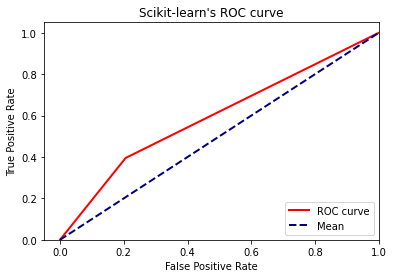

In [ ]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

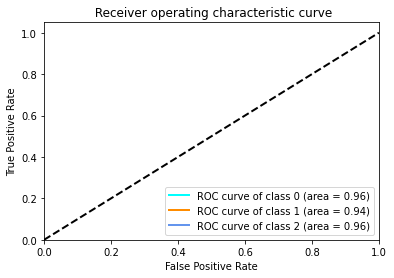

In [ ]:
lw=2
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr=[0.12,0.11,0.20,0.04,0.16,0.11,0.02]
tpr=[0.96,0.94,0.96,0.97,0.96,0.96,0.97]
roc_auc=[0.96,0.94,0.96,0.97,0.96,0.96,0.97]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()